<a href="https://colab.research.google.com/github/elctron/SuperStore-Sales/blob/main/SuperStore_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

df = pd.read_excel('sample_data/SuperStore Sales.xlsx')

In [6]:
df.head(), df.columns

(   Row ID+O6G3A1:R6        Order ID Order Date  Ship Date       Ship Mode  \
 0                 1  CA-2019-152156 2019-11-08 2019-11-11    Second Class   
 1                 2  CA-2019-152156 2019-11-08 2019-11-11    Second Class   
 2                 3  CA-2019-138688 2019-06-12 2019-06-16    Second Class   
 3                13  CA-2020-114412 2020-04-15 2020-04-20  Standard Class   
 4                14  CA-2019-161389 2019-12-05 2019-12-10  Standard Class   
 
   Customer ID    Customer Name    Segment        Country         City  ...  \
 0    CG-12520      Claire Gute   Consumer  United States    Henderson  ...   
 1    CG-12520      Claire Gute   Consumer  United States    Henderson  ...   
 2    DV-13045  Darrin Van Huff  Corporate  United States  Los Angeles  ...   
 3    AA-10480     Andrew Allen   Consumer  United States      Concord  ...   
 4    IM-15070     Irene Maddox   Consumer  United States      Seattle  ...   
 
           Category Sub-Category  \
 0        Furnitur

The dataset in the "Data" sheet contains the following key columns:

Order Details:

*   Order ID
*   Order Date
*   Ship Date
*   Ship Mode
  
Customer Information:
*   Customer ID
*   Customer Name
*   Segment
  
Location Information:
*   Country
*   City
*   State
*   Region

Product Information:


*   Product ID
*   Category
*   Sub-Category
*   Product Name

Sales Metrics:
*   Sales
*   Quantity
*   Profit
*   Returns

Other Information:
*   Payment Mode
*   Additional columns like ind1, ind2 (appear to be placeholders or metadata).

# Sales Trends Analysis

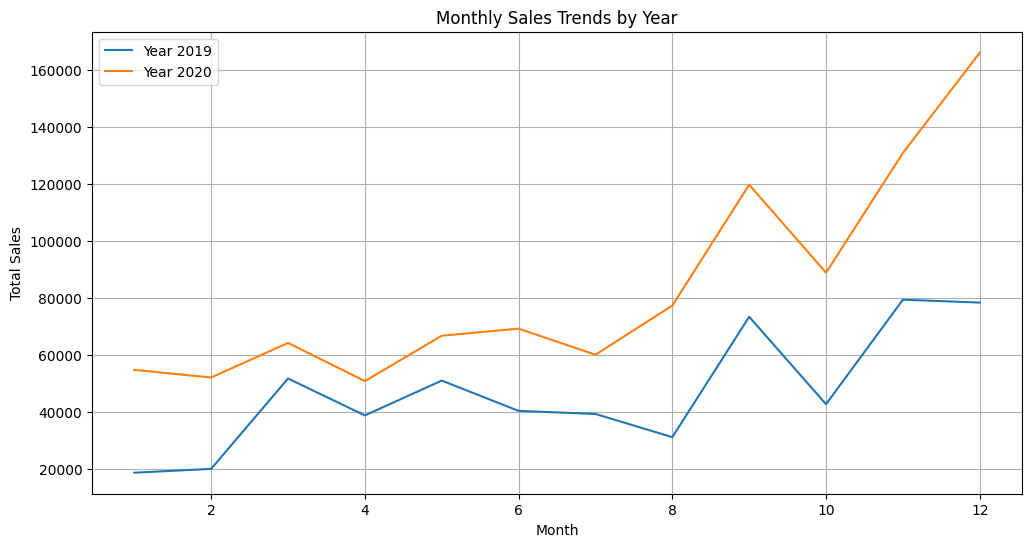

,Sales,Profit
Year,,
2019,5.646795e+05,81823.4411
2020,1.001125e+06,93438.6648


from matplotlib import pyplot as plt
yearly_sales_profit['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
yearly_sales_profit['Profit'].plot(kind='hist', bins=20, title='Profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
yearly_sales_profit.plot(kind='scatter', x='Sales', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Sales']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Sales'}, axis=1)
              .sort_values('Sales', ascending=True))
  xs = counted['Sales']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = yearly_sales_profit.sort_values('Sales', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sales')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Profit']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Profit'}, axis=1)
              .sort_values('Profit', ascending=True))
  xs = counted['Profit']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = yearly_sales_profit.sort_values('Profit', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Profit')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
yearly_sales_profit['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
yearly_sales_profit['Profit'].plot(kind='line', figsize=(8, 4), title='Profit')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
import matplotlib.pyplot as plt

# Convert 'Order Date' to datetime for proper time series analysis
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Add new columns for year and month for trend analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group by year and month to calculate total sales and profit
sales_trend = df.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()

# Pivot data for better visualization
sales_trend_pivot = sales_trend.pivot(index='Month', columns='Year', values='Sales')

# Plot sales trends by year
plt.figure(figsize=(12, 6))
for year in sales_trend['Year'].unique():
    plt.plot(sales_trend[sales_trend['Year'] == year]['Month'],
             sales_trend[sales_trend['Year'] == year]['Sales'], label=f'Year {year}')

plt.title('Monthly Sales Trends by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

# Summarize yearly trends
yearly_sales_profit = df.groupby('Year')[['Sales', 'Profit']].sum()
yearly_sales_profit

Monthly Sales Trends:

* Sales increased significantly in 2020 compared to 2019.
* There appear to be peaks during certain months, possibly due to seasonal or promotional factors.

# Product or Category Performance Analysis

We'll examine:

-Top-performing categories and sub-categories based on sales and profit.

-Product-level insights: Identify best-selling and least-performing products.

-Profitability across categories.

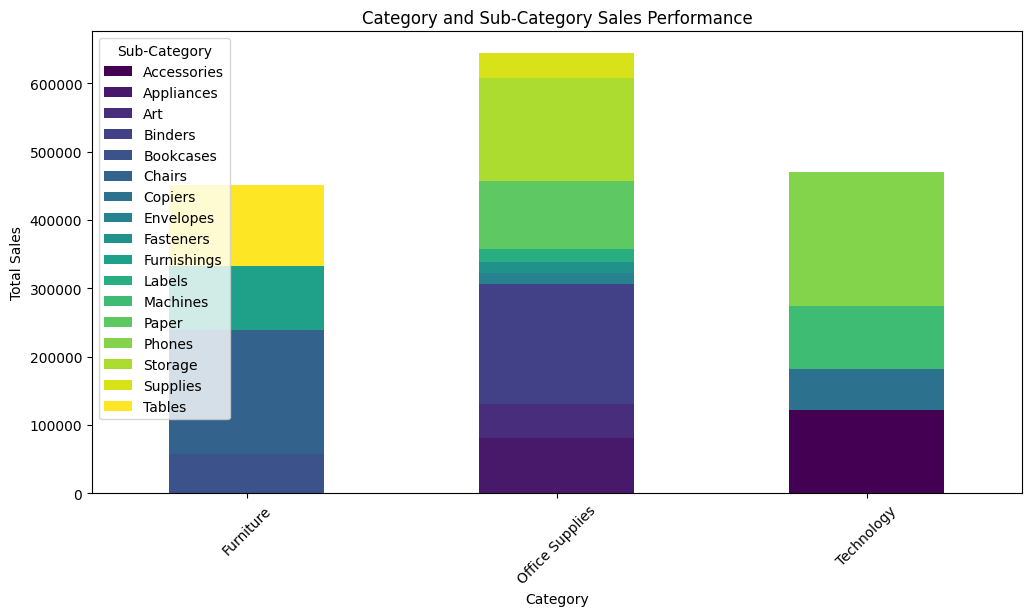

Category Performance:
                                    Sales      Profit
Category        Sub-Category                         
Technology      Phones        196563.5460  22308.9179
Furniture       Chairs        181945.9980  13406.7032
Office Supplies Binders       174978.3900  17885.3759
                Storage       150341.3180  13607.0875
Technology      Accessories   122301.0860  25336.6455
Furniture       Tables        119293.7430 -11091.6365
Office Supplies Paper          99453.6120  21112.3779
Furniture       Furnishings    92691.2180   8034.4328
Technology      Machines       91987.5610     38.1024
Office Supplies Appliances     80305.2470  13166.6098
Technology      Copiers        59735.7980  42774.5828
Furniture       Bookcases      57577.6862   -342.8883
Office Supplies Art            50762.9760   3635.9257
                Supplies       36720.9860  -1654.2767
                Labels         19397.4560   2937.2212
                Envelopes      16542.4640   3508.5073
      

In [11]:
category_performance = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Top products
top_products = df.groupby('Product Name')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(10)

# Plot category performance
category_performance['Sales'].unstack().plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Category and Sub-Category Sales Performance')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

# Print the results
print("Category Performance:")
print(category_performance)

print("\nTop Products:")
print(top_products)

# Profitability across categories

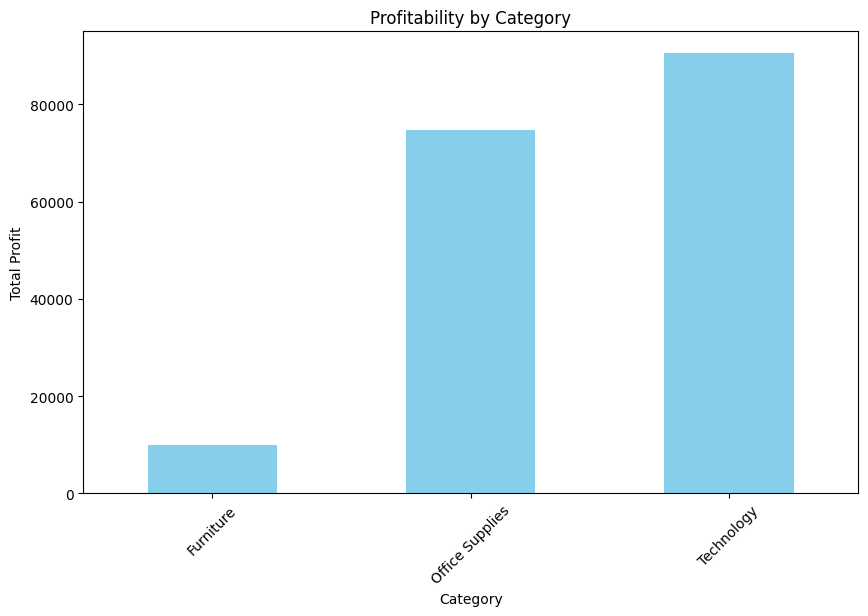

Profitability by Sub-Category:
           Category Sub-Category      Profit
14       Technology      Copiers  42774.5828
13       Technology  Accessories  25336.6455
16       Technology       Phones  22308.9179
10  Office Supplies        Paper  21112.3779
6   Office Supplies      Binders  17885.3759
11  Office Supplies      Storage  13607.0875
1         Furniture       Chairs  13406.7032
4   Office Supplies   Appliances  13166.6098
2         Furniture  Furnishings   8034.4328
5   Office Supplies          Art   3635.9257
7   Office Supplies    Envelopes   3508.5073
9   Office Supplies       Labels   2937.2212
8   Office Supplies    Fasteners    598.4175
15       Technology     Machines     38.1024
0         Furniture    Bookcases   -342.8883
12  Office Supplies     Supplies  -1654.2767
3         Furniture       Tables -11091.6365


In [12]:
category_profit = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()

# Plot category profitability
plt.figure(figsize=(10, 6))
category_profit.groupby('Category')['Profit'].sum().plot(kind='bar', color='skyblue')
plt.title('Profitability by Category')
plt.ylabel('Total Profit')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

# Sub-category breakdown
sub_category_profit = category_profit.sort_values(by='Profit', ascending=False)

# Print the results
print("Profitability by Sub-Category:")
print(sub_category_profit)

#  Regional Analysis

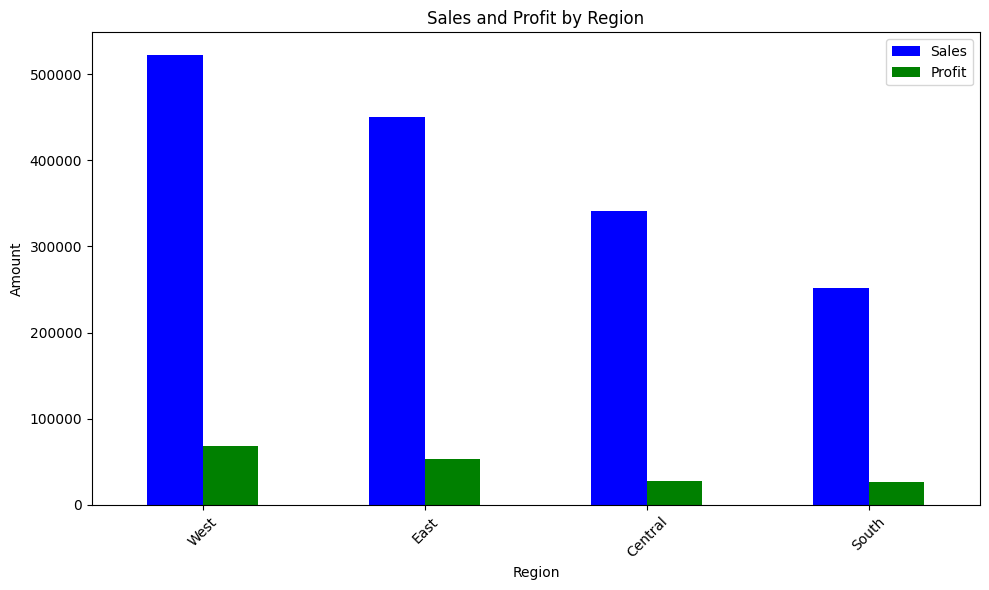

Regional Performance:
               Sales      Profit
Region                          
West     522441.0520  67859.9582
East     450234.6660  53400.4243
Central  341007.5242  27450.0071
South    252121.0810  26551.7163


In [13]:
region_performance = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Plot regional sales and profit
region_performance.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
plt.title('Sales and Profit by Region')
plt.ylabel('Amount')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(['Sales', 'Profit'])
plt.tight_layout()
plt.show()

# Print regional summary
print("Regional Performance:")
print(region_performance)